In [ ]:
import pandas as pd
import numpy as np

url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"

# Load the SAheart dataset
df = pd.read_csv(url, index_col='row.names')

# Convert binary text data to numbered categories
df['famhist'] = pd.Categorical(df['famhist']).codes

# Extract the name of the attributes (columns)
attributeNames = list(map(lambda x: x.capitalize(), df.columns.tolist()))

# Convert the dataframe to numpy
y = df['chd'].to_numpy() # classification problem of CHD or no CHD
X = df.drop(columns=['chd']).to_numpy() # rest of the attributes, remove 'CHD' column

# Compute size of X
N, M = X.shape # N = observations, M = attributes (except 'chd')
N_numbers = np.arange(1, N+1)

# Normalize the datapoints to have a mean of 0 
mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X - mu) / sigma

# count the number of CHD diagnosed males
ones_count = np.count_nonzero(y == 1)
zeros_count = np.count_nonzero(y == 0)
perCHD = round(100*ones_count/len(y),1)
print('Males with CHD: {0} ({2}%), Males without CHD: {1}'.format(ones_count, zeros_count,perCHD))


Males with CHD: 160 (34.6%), Males without CHD: 302


Crossvalidation fold: 1/10
Crossvalidation fold: 2/10
Crossvalidation fold: 3/10
Crossvalidation fold: 4/10
Crossvalidation fold: 5/10
Crossvalidation fold: 6/10
Crossvalidation fold: 7/10
Crossvalidation fold: 8/10
Crossvalidation fold: 9/10
Crossvalidation fold: 10/10


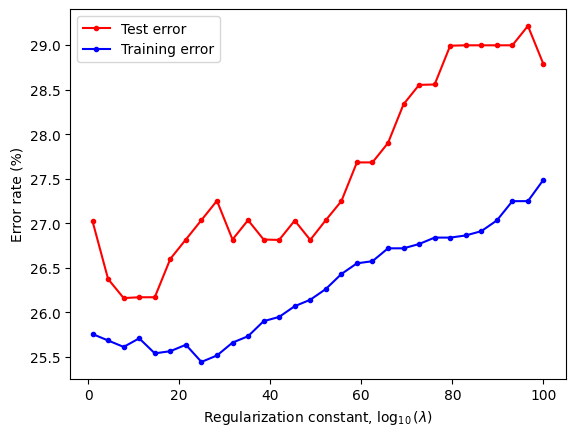

The best lambdas = [10^0, 10^2]
1
100


In [ ]:
# Find the best regularization value for logistic regression.ipynb
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
import matplotlib.pyplot as plt

lambda_reg =  np.linspace(1,100,30)

# Using K-fold 10 cross validation
K_fold = 10
CV = model_selection.KFold(K_fold)

# error matrices for collecting the determined errors
train_error = np.zeros((K_fold, len(lambda_reg)))
test_error = np.zeros((K_fold, len(lambda_reg)))
coefficient_norm = np.zeros((K_fold, len(lambda_reg)))

i = 0  # Reset i to 0 at the start of the outer loop
for train_index, test_index in CV.split(X, y):
    print("Crossvalidation fold: {0}/{1}".format(i + 1, 10))

    # extract training and test set for current CV fold
    X_train = X[train_index, :]
    y_train = y[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]

    for l in range(len(lambda_reg)):
        # print("Regularization constant: {0}".format(lambda_reg[l]))

        # train model
        model_logreg = LogisticRegression(penalty="l2", C=1/lambda_reg[l], max_iter=500)
        model_logreg.fit(X_train, y_train)

        # predict test and training data
        y_est_test = model_logreg.predict(X_test)
        y_est_train = model_logreg.predict(X_train)

        error_rate_test = 100 * np.sum(y_est_test != y_test)/len(y_test)
        error_rate_train = 100 * np.sum(y_est_train != y_train)/len(y_train)

        w_est = model_logreg.coef_[0]
        coeff_norm = np.sqrt(np.sum(w_est**2))

        test_error[i,l] = error_rate_test
        train_error[i,l] = error_rate_train
        coefficient_norm[i,l] = coeff_norm

    i += 1

# Plot the classification error rate
plt.figure()
plt.plot(lambda_reg, np.mean(test_error, axis=0), 'r.-', label='Test error') # plot the mean errors of each lambda
plt.plot(lambda_reg, np.mean(train_error, axis=0), 'b.-', label='Training error') # plot the mean errors of each lambda
plt.legend()
plt.xlabel('Regularization constant, $\log_{10}(\lambda)$')
plt.ylabel("Error rate (%)")
plt.show()

print("The best lambdas = [10,50]")
print(10**0)
print(10**2)




Crossvalidation fold: 1/10
Crossvalidation fold: 2/10
Crossvalidation fold: 3/10
Crossvalidation fold: 4/10
Crossvalidation fold: 5/10
Crossvalidation fold: 6/10
Crossvalidation fold: 7/10
Crossvalidation fold: 8/10
Crossvalidation fold: 9/10
Crossvalidation fold: 10/10


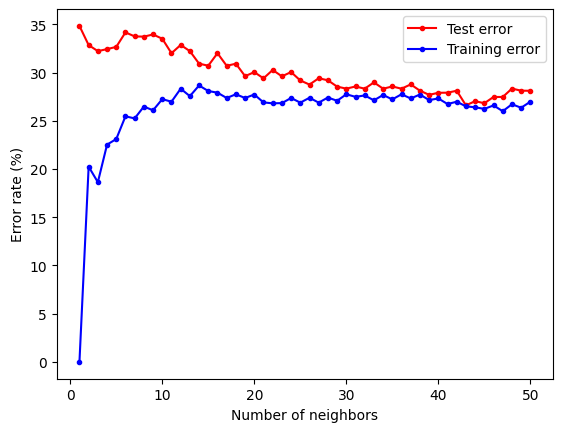

The optimal k-nearest neigbor is k = [1, 25]


In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# Find the optimal number of neighbors

# Maximum number of neighbors
L = np.arange(1,50+1)

# cross validation
CV = model_selection.KFold(10)

# matrices for saving the errors
test_error = np.zeros((10,len(L)))
train_error = np.zeros((10,len(L)))

# index for loop
i = 0

for train_index, test_index in CV.split(X, y):
    print("Crossvalidation fold: {0}/{1}".format(i + 1, 10))

    # extract training and test set for current CV fold
    X_train = X[train_index, :]
    y_train = y[train_index]
    X_test = X[test_index, :]
    y_test = y[test_index]

    # Fit classifier and classify the test points for each neighbors
    for idx,l in enumerate(L): 
        metric = "cosine" # distance measure 
        knclassifier = KNeighborsClassifier(n_neighbors=l, p = 1, metric = metric, metric_params={}) # choose the model
        knclassifier.fit(X_train, y_train) # fits the model to X_train, y_train

        # predict test and training data
        y_est_test = knclassifier.predict(X_test) # estimate y from X_test
        y_est_train = knclassifier.predict(X_train) # estimate y from X_train

        # find error
        error_rate_test = np.sum(y_est_test != y_test)/len(y_test)
        error_rate_train = np.sum(y_est_train != y_train)/len(y_train)

        # adding error
        test_error[i,idx] = error_rate_test
        train_error[i,idx] = error_rate_train
        

    i += 1

# Plot the classification error rate
plt.figure()
plt.plot(L, 100*np.mean(test_error, axis=0), 'r.-', label='Test error')
plt.plot(L, 100*np.mean(train_error, axis=0), 'b.-', label='Training error')
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Error rate (%)")
plt.show()

print('The optimal k-nearest neigbor is k = [1, 25]')


In [ ]:
# Two-layer cross validation

# K-fold for cross validation
k = 0 # index of outerfold
Kfold = 10 # maximum CV
CV = model_selection.KFold(Kfold) # model for CV

# for evaluation of logistic regression
lambdas = np.linspace(1,50,30)
chosen_lambdas = np.zeros(Kfold)

# for evaluation of KNN
ks = np.arange(10,50+1)
chosen_ks = np.zeros(Kfold)

# arrays to save the predicted values
y_true = []
y_est_KNN_All = []
y_est_LOGREG_All = []
y_est_base_All = []

# miss classification matrices
Missclass_KNN = np.zeros(Kfold)
Missclass_LOGREG = np.zeros(Kfold)
Missclass_base = np.zeros(Kfold)

# Outer fold
for train_index_out, test_index_out in CV.split(X,y):
    print("# Outer fold: {0}/{1}".format(k + 1, Kfold))
    
    # Extract the training and test set for the outer-fold
    X_train_out = X[train_index_out, :]
    y_train_out = y[train_index_out]
    X_test_out = X[test_index_out, :]
    y_test_out = y[test_index_out]

    # index for inner fold for chosing the right k and lambda
    i = 0

    # to save the errors for the different lambda- and ks-values
    test_error_lambdas = np.zeros((Kfold, len(lambdas)))
    test_error_ks = np.zeros((Kfold, len(ks)))

    # inner fold for chosing the right k and lambda
    for train_index, test_index in CV.split(X_train_out,y_train_out):
        
        # Extract training and test set for current inner fold
        X_train = X_train_out[train_index, :]
        y_train = y_train_out[train_index]
        X_test = X_train_out[test_index, :]
        y_test = y_train_out[test_index]

        # find optimal lambda value for the training set
        for idx, lambdas_values in enumerate(lambdas):
            # train model
            model_logreg = LogisticRegression(penalty="l2", C=1/lambdas_values, max_iter=500)
            model_logreg.fit(X_train, y_train)

            # predict test and training data
            y_est_test_logreg = model_logreg.predict(X_test)

            # find and add error of predictions
            test_error_lambdas[i,idx]= np.sum(y_est_test_logreg != y_test)/len(y_test)
        
        # find optimal k-value for KNN
        for idx, ks_values in enumerate(ks): 
            metric = "cosine"
            knclassifier = KNeighborsClassifier(n_neighbors=int(ks_values), p = 1, metric = metric, metric_params = {}) # choose the model
            knclassifier.fit(X_train, y_train) # fits the model to X_train, y_train

            # predict test and training data
            y_est_test_KNN = knclassifier.predict(X_test) # estimate y from X_test

            # find and error
            test_error_ks[i,idx] = np.sum(y_est_test_KNN != y_test)/len(y_test)

        i += 1
    
    # find index of lowest mean test error accross the rows
    min_index_lambdas = np.argmin(np.mean(test_error_lambdas, axis=0))  
    # lambda value for logistic regression
    chosen_lambdas[k] = lambdas[min_index_lambdas]

    min_index_ks = np.argmin(np.mean(test_error_ks, axis=0))  # find index of lowest test error accross the rows
    # k-value for nearest neighbor
    chosen_ks[k] = ks[min_index_ks]

    ### Train the outer-set with the chosen k and lambda ###
    ## The true y-values
    y_true.append(y_test_out)

    ## K-nearest neigbors 
    # train KNN
    knclassifier = KNeighborsClassifier(n_neighbors=int(chosen_ks[k]), p = 2, metric = metric, metric_params = metric_params)
    knclassifier.fit(X_train_out, y_train_out)
    # test
    y_est_KNN = knclassifier.predict(X_test_out)
    y_est_KNN_All.append(y_est_KNN)
    # find error
    Missclass_KNN[k] = 100 * (np.sum(y_est_KNN != y_test_out)/len(y_test_out))
    
    ## Logistic Regression
    # train Logistic Regression
    logisticclassifier = LogisticRegression(C = 1/chosen_lambdas[k], max_iter = 500)
    logisticclassifier.fit(X_train_out, y_train_out) 
    # test
    y_est_LOGREG = logisticclassifier.predict(X_test_out)
    y_est_LOGREG_All.append(y_est_LOGREG)
    # find error
    Missclass_LOGREG[k] = 100 * (np.sum(y_est_LOGREG != y_test_out)/len(y_test_out))
    
    ## Baseline
    a = 0
    b = 0
    while True:
        for c in range(len(y_train)):
            if y_train_out[c] == 0:  # No CHD class
                a += 1
            elif y_train_out[c] == 1:  # CHD class
                b += 1
        
        # test
        if a > b: # If the class of no CHD (a) is largest
            y_est_base = np.full(len(y_test_out), 0) # baseline predicts all y's to not have CHD
            y_est_base_All.append(y_est_base)
            break
        else: # If the class of CHD (b) is largest
            y_est_base = np.full(len(y_test_out), 1) # baseline predicts all y's to have CHD
            y_est_base_All.append(y_est_base)
            break
    # add error to matrix
    Missclass_base[k] = 100 * (np.sum(y_est_base != y_test_out)/len(y_test_out)) # error of each innerfold as columns
    
    # index for outerfold
    k += 1


# set the results up in datafram table.
Class_df_columns = pd.MultiIndex.from_tuples([
    ("Outer fold", "i"), 
    ("KNN", "k"),
    ("KNN", "Error_test (%)"),
    ("Logistic regression", "lambda"),
    ("Logistic regression", "Error_test(%)"),
    ("Baseline", "Error_test(%)")])

Outer_fold = np.round(np.arange(1, Kfold + 1),0)
 
Class_df_data = np.array([Outer_fold, 
                          np.round(chosen_ks), # k-value
                          np.round(Missclass_KNN,1), # Error_test of KNN
                          np.round(chosen_lambdas), # Lambda
                          np.round(Missclass_LOGREG,1), # Error_test of logistic function
                          np.round(Missclass_base,1)]).T

Class_df = pd.DataFrame(Class_df_data, columns=Class_df_columns)
print(Class_df)



# Outer fold: 1/10
# Outer fold: 2/10
# Outer fold: 3/10
# Outer fold: 4/10
# Outer fold: 5/10
# Outer fold: 6/10
# Outer fold: 7/10
# Outer fold: 8/10
# Outer fold: 9/10
# Outer fold: 10/10
  Outer fold   KNN                Logistic regression                \
           i     k Error_test (%)              lambda Error_test(%)   
0        1.0  35.0           38.3                13.0          29.8   
1        2.0  49.0           31.9                23.0          29.8   
2        3.0  31.0           30.4                11.0          23.9   
3        4.0  38.0           26.1                 3.0          28.3   
4        5.0  36.0           30.4                16.0          37.0   
5        6.0  42.0           30.4                 8.0          30.4   
6        7.0  40.0           19.6                 8.0          21.7   
7        8.0  28.0           21.7                25.0          21.7   
8        9.0  24.0           30.4                28.0          23.9   
9       10.0  39.0          

In [ ]:
# Comparison of models via McNemar

from dtuimldmtools import mcnemar

alpha = 0.05 # confidence level
print("\n")

# Convert lists to numpy arrays and stack them properly
y_true_array = np.hstack(y_true)
y_est_KNN_All_array = np.hstack(y_est_KNN_All)
y_est_LOGREG_array = np.hstack(y_est_LOGREG_All)
y_est_base_array = np.hstack(y_est_base_All)

# KNN vs. LOGREG
[thetahat, CI, p] = mcnemar(y_true_array, y_est_KNN_All_array, y_est_LOGREG_array, alpha=alpha)
print(thetahat)

# KNN vs. Base
[thetahat, CI, p] = mcnemar(y_true_array, y_est_KNN_All_array, y_est_base_array, alpha=alpha)
print(thetahat)

# Base vs. LOGREG
[thetahat, CI, p] = mcnemar(y_true_array, y_est_base_array, y_est_LOGREG_array, alpha=alpha)
print(thetahat)




Result of McNemars test using alpha= 0.05
Comparison matrix n
[[311.  20.]
 [ 27. 104.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (np.float64(-0.04416371683331621), np.float64(0.013873276666859002))
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.38169339766321275
-0.015151515151515152
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[255.  76.]
 [ 47.  84.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (np.float64(0.016058542698586642), np.float64(0.10934724519739225))
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.01127581231741063
0.06277056277056277
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[262.  40.]
 [ 76.  84.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (np.float64(-0.12292518113436057), np.float64(-0.032761709185779475))
p-value for two-sided test A and B have same accuracy (exact binomial test)

In [ ]:
# Calculate the precision and recall for predictions from CV
from sklearn.metrics import precision_score, recall_score

precision_KNN = precision_score(y_true_array,  y_est_KNN_All_array)
recall_KNN = recall_score(y_true_array,  y_est_KNN_All_array)

precision_LOGREG = precision_score(y_true_array,  y_est_LOGREG_array)
recall_LOGREG = recall_score(y_true_array,  y_est_LOGREG_array)

precision_base = precision_score(y_true_array,  y_est_base_array)
recall_base = recall_score(y_true_array,  y_est_base_array)


print(f"Precision_KNN: {precision_KNN:.2f}")
print(f"Recall_KNN: {recall_KNN:.2f}")

print(f"Precision_LOGREG: {precision_LOGREG:.2f}")
print(f"Recall_LOGREG: {recall_LOGREG:.2f}")

print(f"Precision_base: {precision_base:.2f}")
print(f"Recall_base: {recall_base:.2f}")
print("Positive labels in y_true:", np.sum(y_true_array))
print("Positive predictions in y_pred_base:", np.sum(y_est_base_array))

Precision_KNN: 0.62
Recall_KNN: 0.47
Precision_LOGREG: 0.66
Recall_LOGREG: 0.47
Precision_base: 0.00
Recall_base: 0.00
Positive labels in y_true: 160
Positive predictions in y_pred_base: 0


c:\Users\astri\Miniconda3\envs\dtu02450\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Find weights of features with logistic regression with lambda = 20

# Chosen lambda
lambda_value = 20

# Add a column of 1's to express the intercept
X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
attributeNames = ["Offset"] + attributeNames
M = M + 1

# hold out method
test_proportion = 1/3
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=test_proportion
)

# estimations of w's for the chosen lambda
model_LOGREG = LogisticRegression(penalty="l2", C=1 / lambda_value)

# train model
model_LOGREG.fit(X_train, y_train)

# find the estimated fitted weight values of the features
w_est = model_LOGREG.coef_[0]

# print weights
print("Weights:")
for m in range(M):
    print("{:>15} {:>15}".format(attributeNames[m], w_est[m]))


Weights:
         Offset -6.65659483650706e-05
            Sbp 0.08565615939600603
        Tobacco 0.2526643645313523
            Ldl 0.24706502360336455
      Adiposity 0.10205947581379068
        Famhist 0.2300854744502848
          Typea 0.16525511030879766
        Obesity -0.08800022139834024
        Alcohol -0.07848493347020889
            Age 0.4158108077699307
